In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


In [2]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded =files.upload()

Saving Dataset Brain Tumor.zip to Dataset Brain Tumor.zip


In [3]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [4]:
# Set paths
train_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def create_cnn_model_with_relu_and_early_stopping(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1 with 32 filters and 3x3 kernel size
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2 with 64 filters and 3x3 kernel size
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3 with 128 filters and 3x3 kernel size
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer with ReLU Activation
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer with Softmax Activation
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model_relu = create_cnn_model_with_relu_and_early_stopping(input_shape)

# Compile the model
model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Model summary
model_relu.summary()

# Early stopping mechanism
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model (make sure train_generator and test_generator are defined)
history = model_relu.fit(
    train_generator,
    epochs=30,  # Adjust based on your needs
    validation_data=test_generator,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 238, 238, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 119, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 117, 117, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,938,948 (49.36 MB)

 Trainable params: 12,938,948 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 452ms/step - accuracy: 0.4486 - loss: 1.2231 - val_accuracy: 0.4870 - val_loss: 1.1972
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 424ms/step - accuracy: 0.6633 - loss: 0.8059 - val_accuracy: 0.6339 - val_loss: 1.0161
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.7145 - loss: 0.7141 - val_accuracy: 0.7117 - val_loss: 0.8112
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 421ms/step - accuracy: 0.7115 - loss: 0.6999 - val_accuracy: 0.7416 - val_loss: 0.6804
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 419ms/step - accuracy: 0.7407 - loss: 0.6473 - val_accuracy: 0.7321 - val_loss: 0.6628
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.7677 - loss: 0.5895 - val_accuracy: 0.6630 - val_loss: 0.9093
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 427ms/step - accuracy: 0.7604 - loss: 0.5966 - val_accuracy: 0.7141 - val_loss: 0.7512
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.7738 - loss: 0.5496 - val

In [6]:
# Evaluate on test data
test_loss, test_acc = model_relu.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the probabilities for test data
y_pred = model_relu.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# AUC Score
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(f'AUC Score: {auc:.4f}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7826 - loss: 0.4848
Test Accuracy: 0.8594
Test Loss: 0.3599
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.92      0.71      0.80       262
  meningioma       0.73      0.74      0.73       306
     notumor       0.87      0.99      0.92       405
   pituitary       0.93      0.94      0.94       300

    accuracy                           0.86      1273
   macro avg       0.86      0.84      0.85      1273
weighted avg       0.86      0.86      0.86      1273

AUC Score: 0.9708


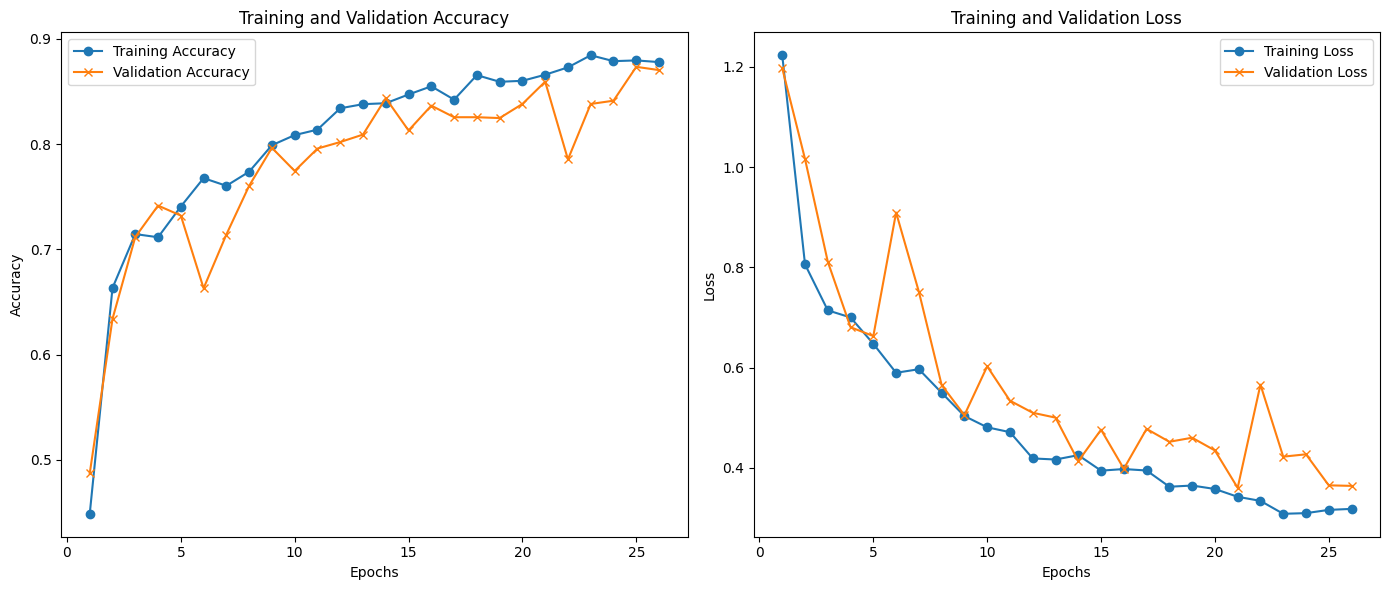

In [7]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 27))

# Accuracy and Loss values for each epoch
train_accuracy = [0.4486, 0.6633, 0.7145, 0.7115, 0.7407, 0.7677, 0.7604, 0.7738, 0.7990, 0.8086,
                  0.8138, 0.8341, 0.8380, 0.8389, 0.8472, 0.8550, 0.8423, 0.8656, 0.8593, 0.8602,
                  0.8660, 0.8730, 0.8845, 0.8789, 0.8796, 0.8780]

val_accuracy = [0.4870, 0.6339, 0.7117, 0.7416, 0.7321, 0.6630, 0.7141, 0.7604, 0.7965, 0.7745,
                0.7958, 0.8020, 0.8091, 0.8437, 0.8130, 0.8366, 0.8256, 0.8256, 0.8248, 0.8382,
                0.8594, 0.7855, 0.8382, 0.8413, 0.8735, 0.8704]

train_loss = [1.2231, 0.8059, 0.7141, 0.6999, 0.6473, 0.5895, 0.5966, 0.5496, 0.5032, 0.4807,
              0.4710, 0.4186, 0.4164, 0.4251, 0.3942, 0.3974, 0.3945, 0.3621, 0.3645, 0.3576,
              0.3420, 0.3339, 0.3081, 0.3094, 0.3159, 0.3179]

val_loss = [1.1972, 1.0161, 0.8112, 0.6804, 0.6628, 0.9093, 0.7512, 0.5651, 0.5050, 0.6023,
            0.5338, 0.5097, 0.5000, 0.4131, 0.4759, 0.3980, 0.4775, 0.4518, 0.4599, 0.4345,
            0.3599, 0.5658, 0.4221, 0.4268, 0.3649, 0.3638]

# Plotting training and validation accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'x-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'x-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
